# Tutorial:   Statistics and Biomechanics  (ISB 2019, Calgary)

&copy; Todd Pataky, 2019

# Notebook 6:  Simulating experiments involving 1D data

The purpose of this notebook is to to demonstrate how to simulate univariate Gaussian 1D data. This notebook requires use of the [**spm1d**](http://www.spm1d.org) package.


"Univariate 1D" means a univariate variable that changes over some domain, like time or space. These data are also called "univariate [Gaussian random fields](http://www.spm1d.org/rft1d/Theory.html)". For simplicity, this and subsequent notebooks shall consider the domain to be time.

___
### Part 1: Generating standard normal 1D data

While most statistical software packages have random number generators that can be used to generate random samples of data, only a very small number of them offer random 1D data generation. 

The easiest way to generate these Gaussian 1D data is like this:

In [1]:
import numpy as np
from matplotlib import pyplot
import spm1d

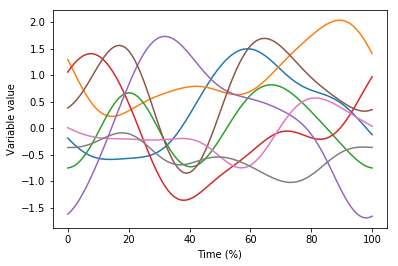

In [2]:
np.random.seed(1)
J      = 8   #sample size
Q      = 101 #number of nodes over the 1D domain
FWHM   = 25  #true sample smoothness

y      = spm1d.rft1d.randn1d(J, Q, FWHM)

ax     = pyplot.axes()
ax.plot(y.T)
ax.set_xlabel('Time (%)')
ax.set_ylabel('Variable value')
pyplot.show()

Here FWHM is the [full-width at half-maximum](https://en.wikipedia.org/wiki/Full_width_at_half_maximum) of a Gaussian kernel which is [convoled](https://en.wikipedia.org/wiki/Convolution) with uncorrelated Gaussian 1D data to yield smooth 1D data.

Uncorrelated Gaussian 1D data look like this:

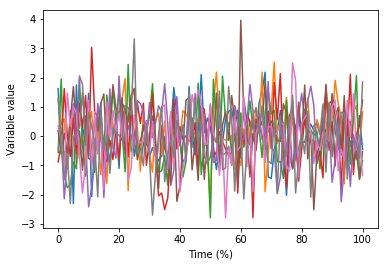

In [3]:
np.random.seed(1)
y      = np.random.randn(J, Q)

ax     = pyplot.axes()
ax.plot(y.T)
ax.set_xlabel('Time (%)')
ax.set_ylabel('Variable value')
pyplot.show()


You can make the data very smooth, like this:

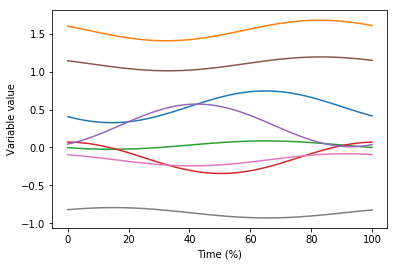

In [4]:
np.random.seed(1)
FWHM   = 80  #true sample smoothness
y      = spm1d.rft1d.randn1d(J, Q, FWHM)

ax     = pyplot.axes()
ax.plot(y.T)
ax.set_xlabel('Time (%)')
ax.set_ylabel('Variable value')
pyplot.show()


or very rough, like this:

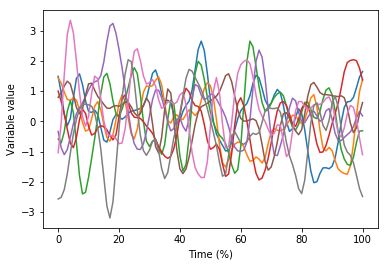

In [5]:
FWHM   = 4  #true sample smoothness
y      = spm1d.rft1d.randn1d(J, Q, FWHM)

ax     = pyplot.axes()
ax.plot(y.T)
ax.set_xlabel('Time (%)')
ax.set_ylabel('Variable value')
pyplot.show()

Below is a more systematic visualization of the qualtiative relation between the FWHM and data smoothness. This image is linked from [this page](http://www.spm1d.org/rft1d/Theory.html); you need to be connected to the internet to see the image below.

<img src="http://www.spm1d.org/rft1d/_images/fig_continua1d.png" alt="Heads" width="600"/>


You can probably tell that some types of biomechanical data exhibit temporal variability that is qualiatively similar to some of these types of data. For example, FWHM=20 looks a bit like temporal variation in ground reaction forces during walking, and FWHM=5 looks a bit like linear envelopes for EMG data.

### Part 2:  Generating realistic multivariate datasets

More realistic-looking 1D data can be generated simply by adding these random fields to known or generated 1D means, like the example below, which uses the [dataset](https://simtk.org/home/runningspeeds) from [Dorn et al. (2012)](http://doi.org/10.1242/jeb.064527). Let's first take a look at the dataset:

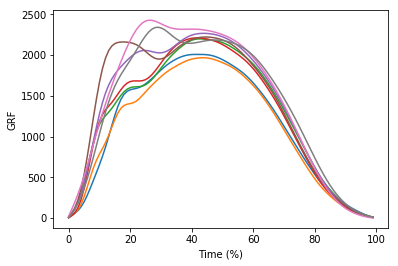

In [6]:
# load dataset:
dataset  = spm1d.data.mv1d.cca.Dorn2012()  #ground reaction forces during running (Dorn, 2012)
y        = dataset.Y   #GRF data: 8 trials, 100 nodes, three components(8, 100, 3)
y        = y[:,:,1]    #select vertical GRF only

# plot:
ax     = pyplot.axes()
ax.plot(y.T)
ax.set_xlabel('Time (%)')
ax.set_ylabel('GRF')
pyplot.show()

Next let's add noise to the sample mean:

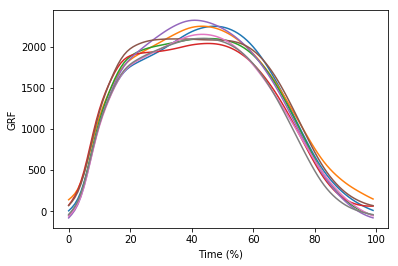

In [7]:
np.random.seed(1)
ybar   = y.mean(axis=0)
J      = 8          #sample size
Q      = ybar.size  #number of nodes over the 1D domain
FWHM   = 25         #true sample smoothness

n      = 100 * spm1d.rft1d.randn1d(J, Q, FWHM)  #noise
y      = ybar + n   #mean plus noise

ax     = pyplot.axes()
ax.plot(y.T)
ax.set_xlabel('Time (%)')
ax.set_ylabel('GRF')
pyplot.show()

This dataset is a completed fictional (simulated) dataset, but looks quite similar to the actual experimental data above. The endpoint forces are somewhat odd, but these can be tapered to smaller variability using weighting functions if desired.

___

### Summary:

Just like the simple univariate 0D data from Notebook 1, it is relatively easy to generate univariate 1D data that look like real experimental biomechanics data. It is therefore possible to simulate an arbitrary number of biomechanics-like experiments BEFORE actually conducting an experiment, to decide: (a) how to analyze the data, (b) how to interpret results from both the simulated and real experiemtns, and (c) what observed effects should be regarded as surprising.